## Import dependencies


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf

## Keypoints using MP holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results 

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# access media pipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read feed
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image, results)

        #show to user
        cv2.imshow('OpenCV Feed', image)

        #break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

results

In [7]:
len(results.right_hand_landmarks.landmark)


21

In [8]:
frame

array([[[188, 178, 179],
        [186, 179, 179],
        [185, 181, 179],
        ...,
        [145, 148, 154],
        [146, 146, 153],
        [147, 148, 154]],

       [[187, 180, 179],
        [187, 182, 180],
        [188, 184, 182],
        ...,
        [147, 152, 157],
        [147, 151, 155],
        [146, 150, 154]],

       [[187, 181, 177],
        [189, 183, 180],
        [190, 184, 182],
        ...,
        [146, 151, 160],
        [145, 150, 159],
        [146, 151, 160]],

       ...,

       [[ 61,  72, 103],
        [ 61,  71, 101],
        [ 61,  70,  99],
        ...,
        [ 52,  35,  99],
        [ 52,  35,  98],
        [ 53,  37, 100]],

       [[ 63,  73, 100],
        [ 62,  72,  97],
        [ 60,  70,  94],
        ...,
        [ 51,  34,  97],
        [ 52,  35,  98],
        [ 53,  37, 100]],

       [[ 66,  72,  98],
        [ 63,  71,  96],
        [ 60,  70,  94],
        ...,
        [ 56,  34,  96],
        [ 59,  35,  98],
        [ 61,  37, 101]]

In [9]:
draw_styled_landmarks(frame, results)

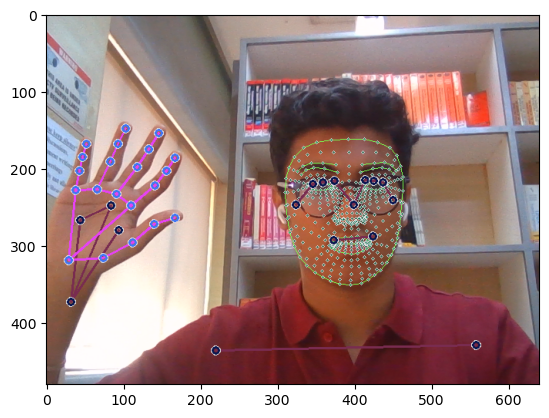

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extarct key points

In [11]:
results.pose_landmarks.landmark # [0].x or .y or .z

[x: 0.6241146
y: 0.5163947
z: -0.92751205
visibility: 0.999768
, x: 0.64736843
y: 0.4495022
z: -0.8374721
visibility: 0.999582
, x: 0.66509223
y: 0.45169035
z: -0.8376397
visibility: 0.9994427
, x: 0.68305486
y: 0.45480472
z: -0.83758336
visibility: 0.99948543
, x: 0.5847962
y: 0.45134154
z: -0.8252676
visibility: 0.9996602
, x: 0.561443
y: 0.45500603
z: -0.8244468
visibility: 0.9996438
, x: 0.5407772
y: 0.45945218
z: -0.82480633
visibility: 0.99977815
, x: 0.70437264
y: 0.503144
z: -0.40007052
visibility: 0.99940026
, x: 0.5074501
y: 0.51612866
z: -0.31970537
visibility: 0.99974865
, x: 0.66254026
y: 0.6006048
z: -0.779445
visibility: 0.99950594
, x: 0.583182
y: 0.6110252
z: -0.7593082
visibility: 0.999693
, x: 0.87210596
y: 0.8953258
z: -0.24569568
visibility: 0.9851827
, x: 0.3440308
y: 0.909891
z: -0.18921846
visibility: 0.99826413
, x: 1.0271741
y: 1.3808836
z: -0.43473426
visibility: 0.05505714
, x: 0.0101895565
y: 1.2743951
z: -0.92263585
visibility: 0.9523413
, x: 1.0679486
y: 

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
    

In [13]:
pose

[array([ 0.62411457,  0.51639467, -0.92751205,  0.99976802]),
 array([ 0.64736843,  0.4495022 , -0.83747208,  0.99958199]),
 array([ 0.66509223,  0.45169035, -0.83763969,  0.9994427 ]),
 array([ 0.68305486,  0.45480472, -0.83758336,  0.99948543]),
 array([ 0.58479619,  0.45134154, -0.82526761,  0.99966019]),
 array([ 0.56144297,  0.45500603, -0.8244468 ,  0.9996438 ]),
 array([ 0.54077721,  0.45945218, -0.82480633,  0.99977815]),
 array([ 0.70437264,  0.50314403, -0.40007052,  0.99940026]),
 array([ 0.5074501 ,  0.51612866, -0.31970537,  0.99974865]),
 array([ 0.66254026,  0.60060477, -0.77944499,  0.99950594]),
 array([ 0.58318198,  0.61102521, -0.75930822,  0.99969298]),
 array([ 0.87210596,  0.89532578, -0.24569568,  0.9851827 ]),
 array([ 0.3440308 ,  0.90989101, -0.18921846,  0.99826413]),
 array([ 1.02717412,  1.38088357, -0.43473426,  0.05505714]),
 array([ 0.01018956,  1.27439511, -0.92263585,  0.95234132]),
 array([ 1.06794858,  1.58588135, -0.79141283,  0.06939657]),
 array([

In [14]:
len(results.pose_landmarks.landmark)

33

In [15]:
len(pose)

33

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() 

In [17]:
len(pose)

132

In [18]:
pose

array([ 6.24114573e-01,  5.16394675e-01, -9.27512050e-01,  9.99768019e-01,
        6.47368431e-01,  4.49502200e-01, -8.37472081e-01,  9.99581993e-01,
        6.65092230e-01,  4.51690346e-01, -8.37639689e-01,  9.99442697e-01,
        6.83054864e-01,  4.54804718e-01, -8.37583363e-01,  9.99485433e-01,
        5.84796190e-01,  4.51341540e-01, -8.25267613e-01,  9.99660194e-01,
        5.61442971e-01,  4.55006033e-01, -8.24446797e-01,  9.99643803e-01,
        5.40777206e-01,  4.59452182e-01, -8.24806333e-01,  9.99778152e-01,
        7.04372644e-01,  5.03144026e-01, -4.00070518e-01,  9.99400258e-01,
        5.07450104e-01,  5.16128659e-01, -3.19705367e-01,  9.99748647e-01,
        6.62540257e-01,  6.00604773e-01, -7.79444993e-01,  9.99505937e-01,
        5.83181977e-01,  6.11025214e-01, -7.59308219e-01,  9.99692976e-01,
        8.72105956e-01,  8.95325780e-01, -2.45695680e-01,  9.85182703e-01,
        3.44030797e-01,  9.09891009e-01, -1.89218462e-01,  9.98264134e-01,
        1.02717412e+00,  

In [19]:
pose.shape

(132,)

In [20]:
len(results.right_hand_landmarks.landmark)

21

In [21]:
results.left_hand_landmarks.landmark

AttributeError: 'NoneType' object has no attribute 'landmark'

In [22]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() 

In [23]:
rh

array([ 4.60581705e-02,  6.66059852e-01,  4.72059412e-07,  1.16213486e-01,
        6.59332514e-01, -2.22814269e-02,  1.75741211e-01,  6.17475927e-01,
       -2.73410063e-02,  2.19566181e-01,  5.68711102e-01, -3.13527100e-02,
        2.61494040e-01,  5.50118566e-01, -3.51185426e-02,  1.72974274e-01,
        5.17012835e-01, -5.27994335e-03,  2.20577627e-01,  4.64109093e-01,
       -1.76737830e-02,  2.44324565e-01,  4.24832553e-01, -2.97099948e-02,
        2.62370497e-01,  3.88538361e-01, -3.94294821e-02,  1.42197281e-01,
        4.85507190e-01, -5.50249498e-03,  1.84397608e-01,  4.12902504e-01,
       -1.63150094e-02,  2.08721742e-01,  3.64818513e-01, -2.85633355e-02,
        2.28437483e-01,  3.21828365e-01, -3.77981961e-02,  1.04459397e-01,
        4.73438799e-01, -9.75839421e-03,  1.30496293e-01,  3.98876727e-01,
       -2.42157690e-02,  1.46625891e-01,  3.50648463e-01, -3.73004265e-02,
        1.62207708e-01,  3.08890313e-01, -4.65226956e-02,  6.05839118e-02,
        4.75962430e-01, -

In [24]:
rh.shape

(63,)

In [25]:
np.zeros(21*3).shape

(63,)

In [26]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3) 

In [27]:
lh.shape

(63,)

In [28]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3) 
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) 
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [29]:
len(results.face_landmarks.landmark)*3 # *3 for lh, rh, face and *4 for pose


1404

In [30]:
pose.shape

(132,)

In [31]:
face.shape

(1404,)

In [32]:
lh.shape

(63,)

In [33]:
rh.shape

(63,)

In [34]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3) 
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) 
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, face, lh, rh])


In [35]:
extract_keypoints(results).shape

(1662,)

In [36]:
468*3 + 33*4 + 2*21*3 # face, pose, lh and rh

1662

In [37]:
extract_keypoints(results)[:10]

array([ 0.62411457,  0.51639467, -0.92751205,  0.99976802,  0.64736843,
        0.4495022 , -0.83747208,  0.99958199,  0.66509223,  0.45169035])

In [38]:
result_test = extract_keypoints(results)

In [39]:
result_test

array([ 0.62411457,  0.51639467, -0.92751205, ...,  0.08252865,
        0.35005343, -0.04521285])

In [41]:
np.save('0', result_test)

In [42]:
np.load('0.npy')

array([ 0.64303964,  0.70052522, -1.25694096, ...,  0.11668571,
        0.42224851, -0.02815055])

## Setup folders for collection

In [52]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')  #change

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'rashford'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

'''
so here bascially we arent just recognizing an action from a single frame,
we are recongixing action over a period of 30 frame and as calculates above,
each frame is an array of 1662 keypoints
'''


'\nso here bascially we arent just recognizing an action from a single frame,\nwe are recongixing action over a period of 30 frame and as calculates above,\neach frame is an array of 1662 keypoints\n'

In [53]:
'''
#hello
    #0
    #1...
    #29 (basically 30 videos/frames for each sequence)
...
#rashford
    #0
    #1...
    #30
'''

'\n#hello\n    #0\n    #1...\n    #29 (basically 30 videos/frames for each sequence)\n...\n#rashford\n    #0\n    #1...\n    #30\n'

In [54]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Collect Keypoints Values for training and Testing

In [46]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Initialize a flag to indicate whether the process should continue
    continue_processing = True
    
    # Initialize the key variable
    key = 0  # You can initialize it to 0 or any other value

    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
                    
                    
    cap.release()
    cv2.destroyAllWindows()

## Preprocessing Data and Create Labels and Features

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [56]:
label_map = {label: num for num, label in enumerate(actions)} 

In [57]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'rashford': 3}

In [58]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
    

In [59]:
sequences

[[array([ 0.61599666,  0.53715229, -1.11687768, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.6716522 ,  0.53736192, -1.07498825, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.68298507,  0.5376941 , -1.10931635, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.68675458,  0.53820121, -1.18246949, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.69021958,  0.53820878, -1.18830323, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.69227928,  0.53850961, -1.17552876, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.69370669,  0.53879488, -1.1692555 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.69553959,  0.53882992, -1.1345619 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.69754142,  0.53904521, -1.0507673 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.69742215,  0.53913152, -1.0025903 , ...,  0.        ,
       

In [60]:
np.array(sequences).shape

(120, 30, 1662)

In [61]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [62]:
np.array(labels).shape

(120,)

In [63]:
X = np.array(sequences)

In [64]:
X.shape

(120, 30, 1662)

In [65]:
y = to_categorical(labels).astype(int)

In [66]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [67]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [68]:
X_train.shape

(114, 30, 1662)

In [69]:
X_test.shape

(6, 30, 1662)

In [70]:
y_train.shape

(114, 4)

In [71]:
y_test.shape

(6, 4)

## Build and Train LSTM Neural Network

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [73]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [74]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [75]:
res = [.7, 0.2, 0.1]

In [76]:
actions[np.argmax(res)]

'hello'

In [77]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [83]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback]) 

Epoch 1/500
4/4 [==============================] - 1s 96ms/step - loss: 1.3699 - categorical_accuracy: 0.3070
Epoch 2/500
4/4 [==============================] - 0s 101ms/step - loss: 1.3705 - categorical_accuracy: 0.3246
Epoch 3/500
4/4 [==============================] - 0s 101ms/step - loss: 1.3719 - categorical_accuracy: 0.3333
Epoch 4/500
4/4 [==============================] - 0s 104ms/step - loss: 1.3703 - categorical_accuracy: 0.4035
Epoch 5/500
4/4 [==============================] - 0s 121ms/step - loss: 1.3735 - categorical_accuracy: 0.3333
Epoch 6/500
4/4 [==============================] - 0s 106ms/step - loss: 1.3709 - categorical_accuracy: 0.2895
Epoch 7/500
4/4 [==============================] - 0s 106ms/step - loss: 1.3707 - categorical_accuracy: 0.3333
Epoch 8/500
4/4 [==============================] - 0s 113ms/step - loss: 1.3698 - categorical_accuracy: 0.3333
Epoch 9/500
4/4 [==============================] - 0s 121ms/step - loss: 1.3704 - categorical_accuracy: 0.3070
Ep

4/4 [==============================] - 0s 121ms/step - loss: 1.3674 - categorical_accuracy: 0.3333
Epoch 147/500
4/4 [==============================] - 1s 148ms/step - loss: 1.3683 - categorical_accuracy: 0.3333
Epoch 148/500
4/4 [==============================] - 1s 121ms/step - loss: 1.3677 - categorical_accuracy: 0.3421
Epoch 149/500
4/4 [==============================] - 1s 128ms/step - loss: 1.3667 - categorical_accuracy: 0.3860
Epoch 150/500
4/4 [==============================] - 1s 146ms/step - loss: 1.3675 - categorical_accuracy: 0.3684
Epoch 151/500
4/4 [==============================] - 1s 131ms/step - loss: 1.3669 - categorical_accuracy: 0.3421
Epoch 152/500
4/4 [==============================] - 1s 126ms/step - loss: 1.3668 - categorical_accuracy: 0.3246
Epoch 153/500
4/4 [==============================] - 1s 154ms/step - loss: 1.3671 - categorical_accuracy: 0.3158
Epoch 154/500
4/4 [==============================] - 1s 149ms/step - loss: 1.3667 - categorical_accuracy: 0.35

4/4 [==============================] - 0s 90ms/step - loss: 1.2041 - categorical_accuracy: 0.4211
Epoch 291/500
4/4 [==============================] - 0s 90ms/step - loss: 1.1709 - categorical_accuracy: 0.4737
Epoch 292/500
4/4 [==============================] - 0s 93ms/step - loss: 1.1292 - categorical_accuracy: 0.4386
Epoch 293/500
4/4 [==============================] - 0s 92ms/step - loss: 1.4243 - categorical_accuracy: 0.3070
Epoch 294/500
4/4 [==============================] - 0s 90ms/step - loss: 1.2990 - categorical_accuracy: 0.2807
Epoch 295/500
4/4 [==============================] - 0s 91ms/step - loss: 1.3011 - categorical_accuracy: 0.2807
Epoch 296/500
4/4 [==============================] - 0s 95ms/step - loss: 1.3406 - categorical_accuracy: 0.3158
Epoch 297/500
4/4 [==============================] - 0s 94ms/step - loss: 1.2988 - categorical_accuracy: 0.3947
Epoch 298/500
4/4 [==============================] - 0s 96ms/step - loss: 1.2602 - categorical_accuracy: 0.3947
Epoch 

4/4 [==============================] - 0s 100ms/step - loss: 0.7398 - categorical_accuracy: 0.6404
Epoch 364/500
4/4 [==============================] - 0s 99ms/step - loss: 0.6884 - categorical_accuracy: 0.7105
Epoch 365/500
4/4 [==============================] - 0s 98ms/step - loss: 0.6277 - categorical_accuracy: 0.7895
Epoch 366/500
4/4 [==============================] - 0s 96ms/step - loss: 0.6822 - categorical_accuracy: 0.7018
Epoch 367/500
4/4 [==============================] - 0s 99ms/step - loss: 0.6046 - categorical_accuracy: 0.7719
Epoch 368/500
4/4 [==============================] - 0s 96ms/step - loss: 0.5627 - categorical_accuracy: 0.8070
Epoch 369/500
4/4 [==============================] - 0s 93ms/step - loss: 0.5566 - categorical_accuracy: 0.8158
Epoch 370/500
4/4 [==============================] - 0s 97ms/step - loss: 0.5834 - categorical_accuracy: 0.7193
Epoch 371/500
4/4 [==============================] - 0s 90ms/step - loss: 0.7622 - categorical_accuracy: 0.6491
Epoch

4/4 [==============================] - 0s 104ms/step - loss: 0.4416 - categorical_accuracy: 0.8158
Epoch 437/500
4/4 [==============================] - 0s 108ms/step - loss: 0.4234 - categorical_accuracy: 0.8158
Epoch 438/500
4/4 [==============================] - 0s 100ms/step - loss: 0.7117 - categorical_accuracy: 0.6842
Epoch 439/500
4/4 [==============================] - 0s 105ms/step - loss: 0.6885 - categorical_accuracy: 0.7368
Epoch 440/500
4/4 [==============================] - 0s 99ms/step - loss: 0.6282 - categorical_accuracy: 0.6754
Epoch 441/500
4/4 [==============================] - 0s 100ms/step - loss: 0.7207 - categorical_accuracy: 0.6754
Epoch 442/500
4/4 [==============================] - 0s 100ms/step - loss: 0.6149 - categorical_accuracy: 0.7105
Epoch 443/500
4/4 [==============================] - 0s 106ms/step - loss: 0.7224 - categorical_accuracy: 0.7456
Epoch 444/500
4/4 [==============================] - 0s 108ms/step - loss: 0.6360 - categorical_accuracy: 0.763

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596708 (2.28 MB)
Trainable params: 596708 

## Make predictions

In [78]:
res = model.predict(X_test)

1/1 [==============================] - 1s 884ms/step


In [79]:
actions[np.argmax(res[4])]

'iloveyou'

In [80]:
actions[np.argmax(y_test[4])]

'hello'

## Save weights

In [89]:
model.save('my_model.keras')

In [63]:
model.save('my_model_new.h5')

C:\Users\hrida\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
del model #dont run

In [81]:
model.load_weights('my_model_new.h5') #dont run

## Evaluation using confusion matrix

In [82]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [83]:
yhat = model.predict(X_train)

4/4 [==============================] - 0s 21ms/step


In [84]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [85]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[77,  9],
        [ 0, 28]],

       [[84,  1],
        [ 1, 28]],

       [[83,  3],
        [10, 18]],

       [[84,  1],
        [ 3, 26]]], dtype=int64)

In [88]:
accuracy_score(ytrue, yhat)

0.8771929824561403

## Real time prediction

In [95]:
colors = [(245,117,16), (117,245,16), (16,117,245), (128, 0, 128) ]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

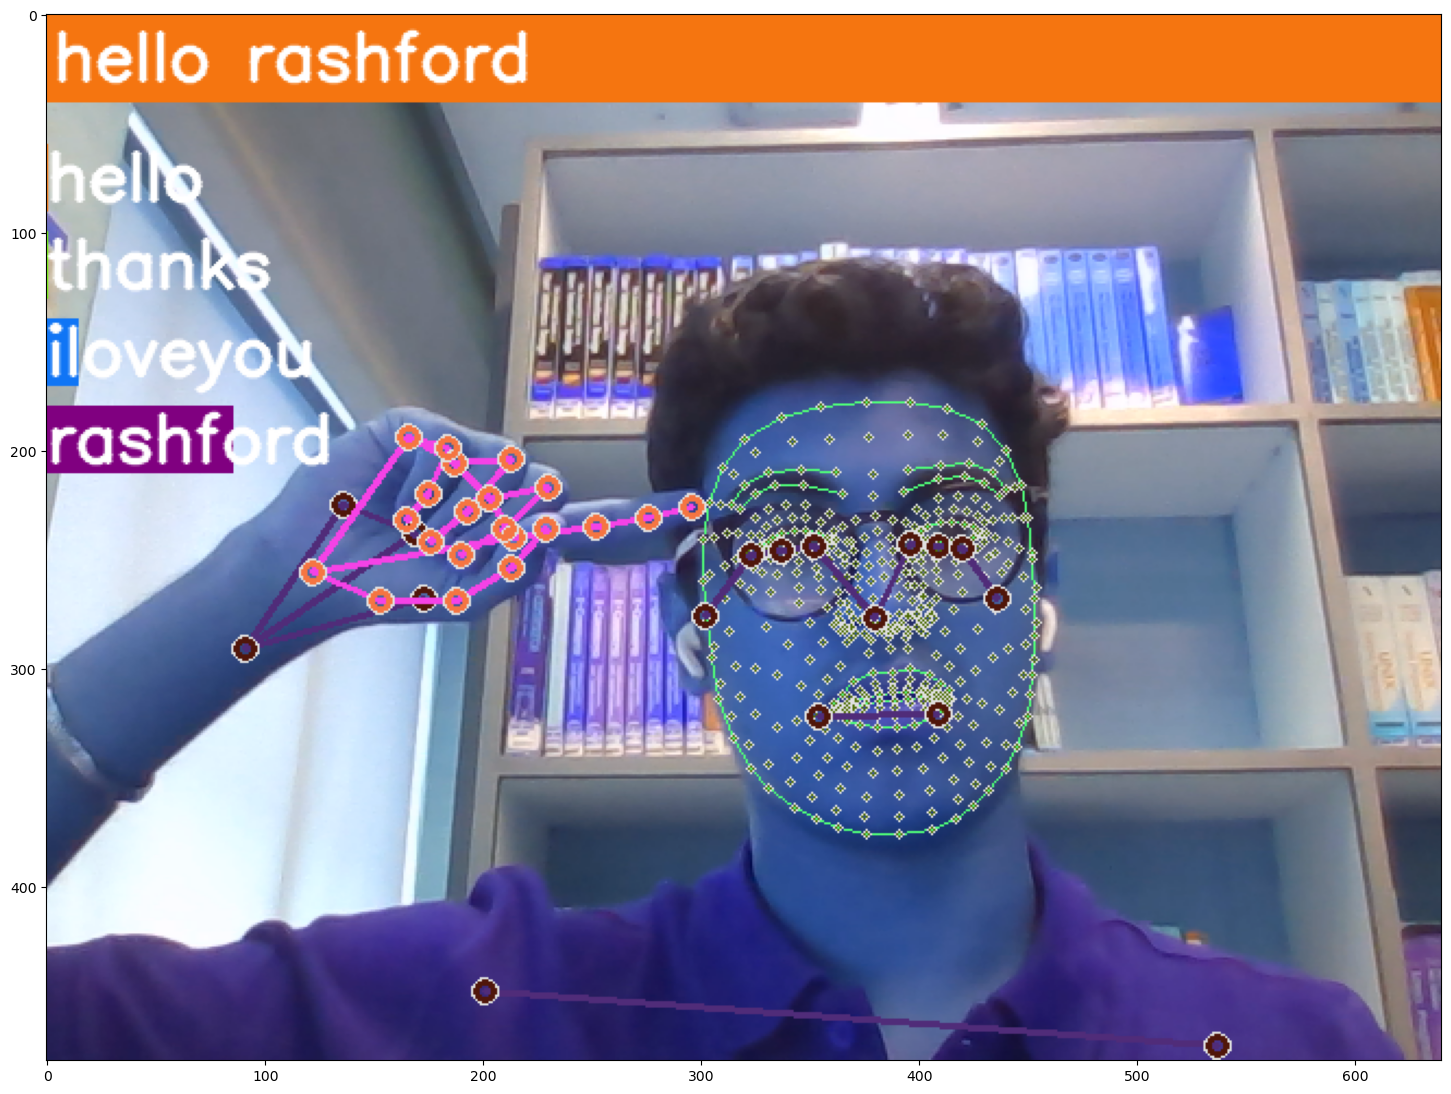

In [96]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [97]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() #can you see???

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 27ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
rash

rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
rashford
<class 'mediapipe.python.solution_base.Solution

1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<

1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 9ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
rashf

rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
rashford
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
rashford
<class 'mediapipe.python.solution_base.Solution

In [110]:
cap.release()
cv2.destroyAllWindows()